In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [4]:
df = pd.read_csv("/Users/revanthreddy/Desktop/cleaned_dataset_retail_store_sales.csv", low_memory=False)


In [5]:
df.head()

,Transaction_ID,Customer_ID,Category,Item,Price_per_Unit,Quantity,Total_Spent,Payment_method,Location,Transaction_Date,Discount_applied,Unit_Cost,Total_Sale,Total_Cost,Profit
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,2024-04-08,TRUE,11.1,185.0,111.0,74.0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9,261.0,Digital Wallet,Online,2023-07-23,TRUE,17.4,261.0,156.6,104.4
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2,43.0,Credit Card,Online,2022-10-05,FALSE,12.9,43.0,25.8,17.2
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9,247.5,Credit Card,Online,2022-05-07,Unknown,16.5,247.5,148.5,99.0
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7,87.5,Digital Wallet,Online,2022-10-02,FALSE,7.5,87.5,52.5,35.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    12575 non-null  object 
 1   Customer_ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              12575 non-null  object 
 4   Price_per_Unit    12575 non-null  float64
 5   Quantity          12575 non-null  int64  
 6   Total_Spent       12575 non-null  float64
 7   Payment_method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction_Date  12575 non-null  object 
 10  Discount_applied  12575 non-null  object 
 11  Unit_Cost         12575 non-null  float64
 12  Total_Sale        12575 non-null  float64
 13  Total_Cost        12575 non-null  float64
 14  Profit            12575 non-null  float64
dtypes: float64(6), int64(1), object(8)
memory usage: 1.4+ MB


In [7]:
df.shape

(12575, 15)

In [8]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%Y-%m-%d')

In [9]:
df['Category'] = df['Category'].astype('category')
df['Payment_method'] = df['Payment_method'].astype('category')
df['Location'] = df['Location'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    12575 non-null  object        
 1   Customer_ID       12575 non-null  object        
 2   Category          12575 non-null  category      
 3   Item              12575 non-null  object        
 4   Price_per_Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  int64         
 6   Total_Spent       12575 non-null  float64       
 7   Payment_method    12575 non-null  category      
 8   Location          12575 non-null  category      
 9   Transaction_Date  12575 non-null  datetime64[ns]
 10  Discount_applied  12575 non-null  object        
 11  Unit_Cost         12575 non-null  float64       
 12  Total_Sale        12575 non-null  float64       
 13  Total_Cost        12575 non-null  float64       
 14  Profit            1257

In [11]:
df.describe()

,Price_per_Unit,Quantity,Total_Spent,Transaction_Date,Unit_Cost,Total_Sale,Total_Cost,Profit
count,12575.000000,12575.000000,12575.000000,12575,12575.000000,12575.000000,12575.000000,12575.000000
mean,22.234314,5.270457,123.425129,2023-07-12 20:23:41.105368064,13.340588,117.137058,70.282235,46.854823
min,0.000000,0.000000,0.000000,2022-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,12.500000,3.000000,43.500000,2022-09-30 00:00:00,7.500000,37.500000,22.500000,15.000000
50%,23.000000,5.000000,100.000000,2023-07-13 00:00:00,13.800000,93.000000,55.800000,37.200000
75%,32.000000,8.000000,184.000000,2024-04-24 00:00:00,19.200000,180.000000,108.000000,72.000000
max,41.000000,10.000000,410.000000,2025-01-18 00:00:00,24.600000,410.000000,246.000000,164.000000
std,11.618742,3.029325,96.514921,NaN,6.971245,97.782826,58.669696,39.113130


In [12]:
for col in ['Price_per_Unit', 'Quantity', 'Total_Spent', 'Unit_Cost', 'Total_Sale', 'Total_Cost', 'Profit']:
    print(f"{col}: {(df[col] == 0).sum()} zeros")


Price_per_Unit: 609 zeros
Quantity: 604 zeros
Total_Spent: 604 zeros
Unit_Cost: 609 zeros
Total_Sale: 1213 zeros
Total_Cost: 1213 zeros
Profit: 1213 zeros


In [17]:
for col in ['Transaction_ID','Category', 'Payment_method', 'Location','Customer_ID','Item','Discount_applied']:
    print(f"{col}: {(df[col] == 'Unknown').sum()} Unknowns")


Transaction_ID: 0 Unknowns
Category: 0 Unknowns
Payment_method: 0 Unknowns
Location: 0 Unknowns
Customer_ID: 0 Unknowns
Item: 1213 Unknowns
Discount_applied: 4199 Unknowns


In [19]:
print(df.info())
print(df.describe(include='all'))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    12575 non-null  object        
 1   Customer_ID       12575 non-null  object        
 2   Category          12575 non-null  category      
 3   Item              12575 non-null  object        
 4   Price_per_Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  int64         
 6   Total_Spent       12575 non-null  float64       
 7   Payment_method    12575 non-null  category      
 8   Location          12575 non-null  category      
 9   Transaction_Date  12575 non-null  datetime64[ns]
 10  Discount_applied  12575 non-null  object        
 11  Unit_Cost         12575 non-null  float64       
 12  Total_Sale        12575 non-null  float64       
 13  Total_Cost        12575 non-null  float64       
 14  Profit            1257

In [57]:
numeric_cols = ['Price_per_Unit', 'Quantity', 'Total_Spent', 'Unit_Cost', 'Total_Sale', 'Total_Cost', 'Profit']
zero_counts = (df[numeric_cols] == 0).sum()

In [59]:
# Count of "Unknown" in categorical columns
categorical_cols = ['Transaction_ID','Category', 'Payment_method', 'Location','Customer_ID','Item','Discount_applied']
unknown_counts = df[categorical_cols].apply(lambda x: (x == 'Unknown').sum())


In [61]:
print("Zeros in numeric columns:\n", zero_counts)
print("Unknowns in categorical columns:\n", unknown_counts)

Zeros in numeric columns:
 Price_per_Unit      0
Quantity            0
Total_Spent       604
Unit_Cost           0
Total_Sale          0
Total_Cost          0
Profit              0
dtype: int64
Unknowns in categorical columns:
 Transaction_ID      0
Category            0
Payment_method      0
Location            0
Customer_ID         0
Item                0
Discount_applied    0
dtype: int64


In [63]:
# Replace zero values with NaN in key columns
cols_to_clean = ['Price_per_Unit', 'Quantity', 'Unit_Cost']
df[cols_to_clean] = df[cols_to_clean].replace(0, np.nan)

In [65]:
# Impute NaN values with median 
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())



In [67]:
# Recalculate totals
df['Total_Sale'] = df['Price_per_Unit'] * df['Quantity']
df['Total_Cost'] = df['Unit_Cost'] * df['Quantity']
df['Profit'] = df['Total_Sale'] - df['Total_Cost']

In [69]:
# Fix Discount_applied
df['Discount_applied'] = df['Discount_applied'].replace('Unknown', 'No')
df['Discount_applied'] = df['Discount_applied'].map({'Yes': 1, 'No': 0})

In [71]:
# Optional: Replace 'Unknown' in Item if you want a separate category
df['Item'] = df['Item'].replace('Unknown', 'Missing_Item')

In [73]:
# Set up visual style
sns.set(style="whitegrid")
num_cols = ['Price_per_Unit', 'Quantity', 'Unit_Cost', 'Total_Sale', 'Total_Cost', 'Profit']

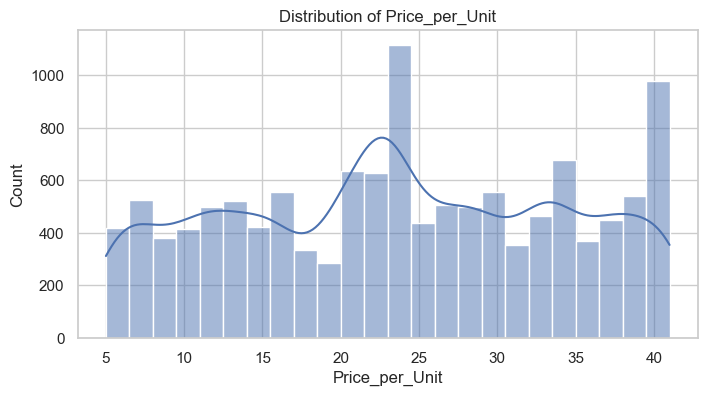

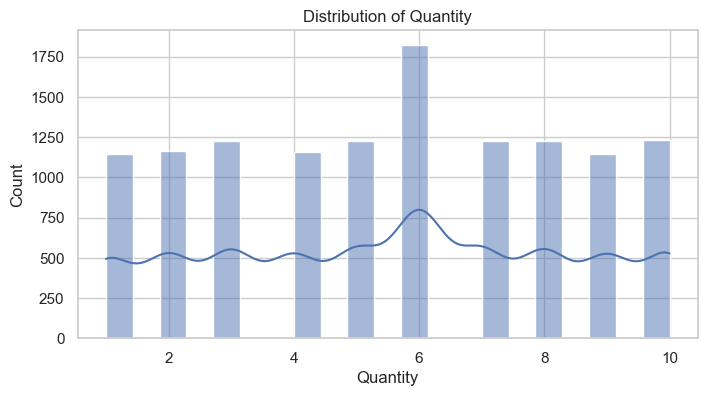

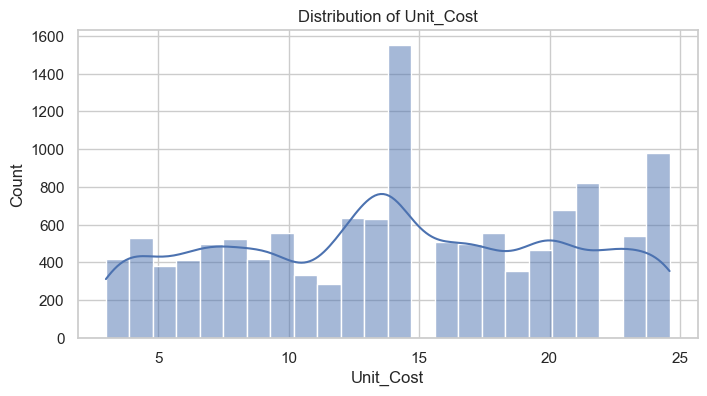

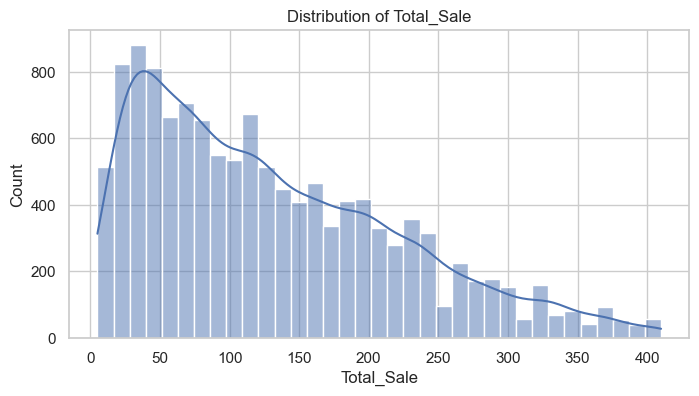

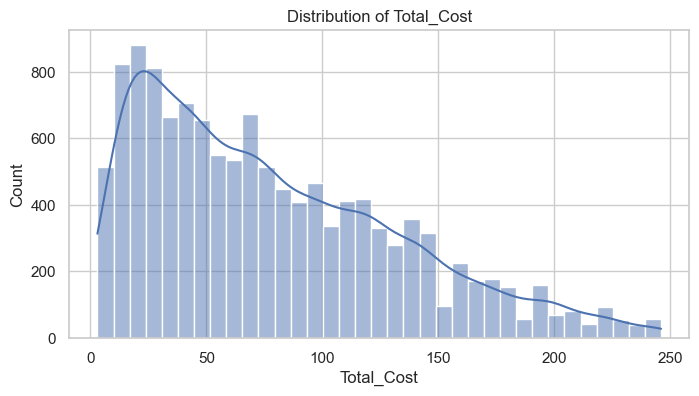

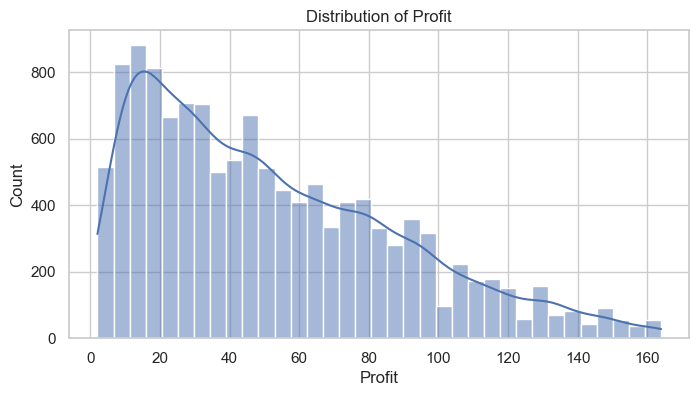

In [75]:
# Visualize the distribution of each numerical column using histograms
# This helps understand the spread and central tendency of the data
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [76]:
#Visualize the distribution and identify outliers using boxplots

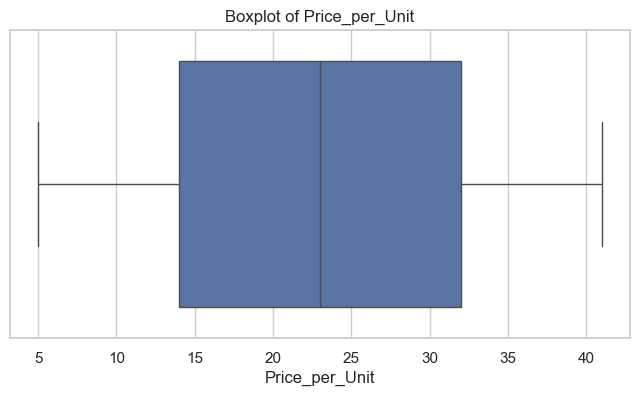

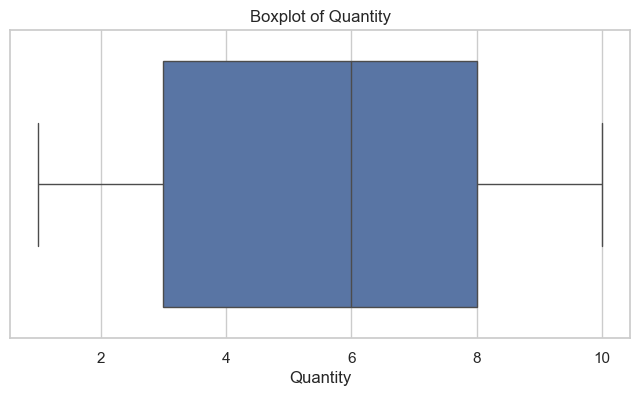

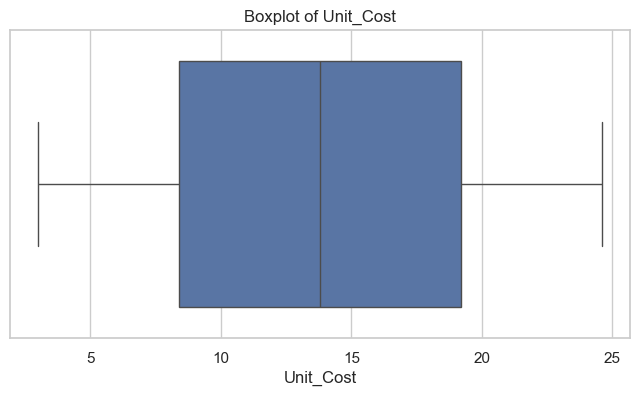

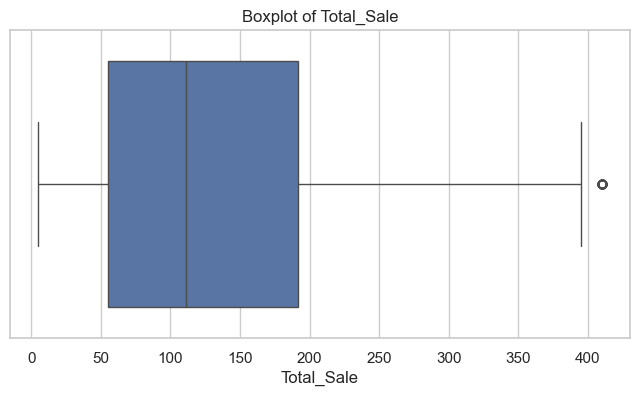

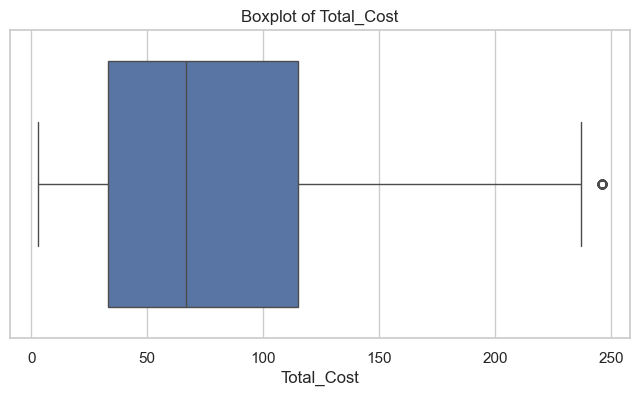

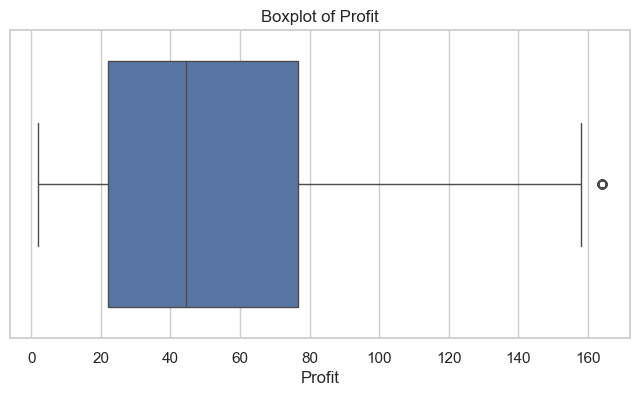

In [77]:
#Visualize the distribution and identify outliers using boxplots
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



In [78]:
columns_for_corr = ['Price_per_Unit', 'Quantity', 'Unit_Cost', 'Total_Sale', 'Total_Cost', 'Profit']
correlation_df = df[columns_for_corr]


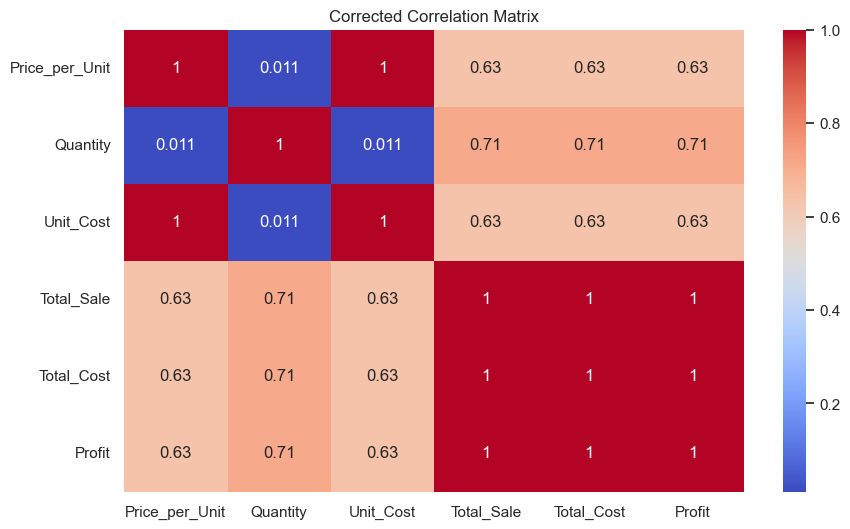

In [81]:
#heatmap of the correlation matrix to understand relationships between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm')
plt.title("Corrected Correlation Matrix")
plt.show()


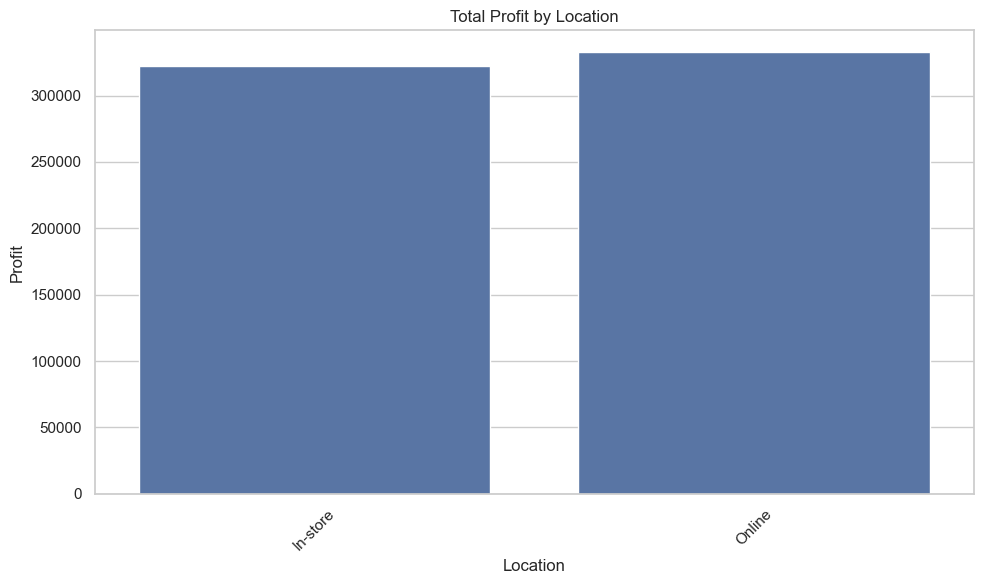

In [85]:
# Analyze total profit by location using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Location", y="Profit", estimator=sum, errorbar=None)
plt.title("Total Profit by Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


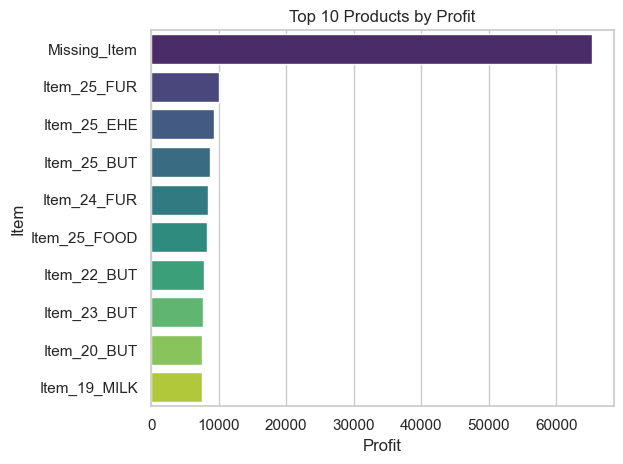

In [87]:
top_products = df.groupby("Item")["Profit"].sum().nlargest(10).reset_index()

sns.barplot(
    data=top_products,
    x="Profit",
    y="Item",
    hue="Item",        
    palette="viridis",
    legend=False              
)

plt.title("Top 10 Products by Profit")
plt.tight_layout()
plt.show()


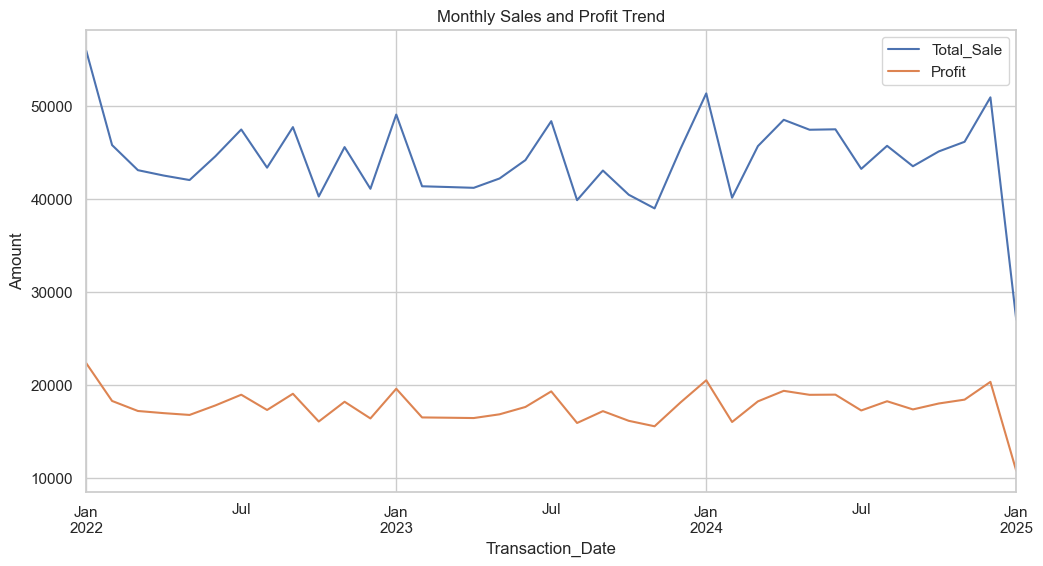

In [89]:
#Analyze the top 10 most profitable products
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])
monthly = df.groupby(df["Transaction_Date"].dt.to_period("M"))[["Total_Sale", "Profit"]].sum()
monthly.index = monthly.index.to_timestamp()

monthly.plot(figsize=(12, 6), title="Monthly Sales and Profit Trend")
plt.ylabel("Amount")
plt.grid(True)
plt.show()

In [91]:
df.to_csv("/Users/revanthreddy/downloads/processed_data_for_dashboard.csv", index=False)
